*Comparação de métricas de três algorítmos diferentes em uma mesma base de dados*

In [27]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

In [28]:
#definindo tamanho das figures
plt.rcParams['figure.figsize']=[15,10]
plt.rcParams.update({'font.size': 18})

In [29]:
#importando a base de dados
url = 'https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/vinhos-binario.csv'

In [30]:
vinhos = pd.read_csv(url, sep=',')
vinhos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [31]:
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
#Separando os atributos dos rótulos e separando os dados de treinamento (90%) e teste (10%)
vinhos_atributos = vinhos.iloc[:,:11]
vinhos_classes = vinhos['quality']
vinhos_treino, vinhos_teste, classes_treino, classes_teste = train_test_split(vinhos_atributos, vinhos_classes, test_size=0.1)

In [33]:
#Diminuindo a escala dos dados para melhorar o treinamento.
scaler = StandardScaler()
vinhos_treino = scaler.fit_transform(vinhos_treino)
vinhos_teste = scaler.transform(vinhos_teste)

In [34]:
#algoritmo k-NN
modelo_KNN = KNeighborsClassifier(n_neighbors=20)
modelo_KNN.fit(vinhos_treino, classes_treino)

KNeighborsClassifier(n_neighbors=20)

In [35]:
#Verificando a acurácia de classificação do k-NN
predicao_KNN = modelo_KNN.predict(vinhos_teste)
acuracia_KNN = accuracy_score(classes_teste, predicao_KNN)
print('Acurácia de classificação K-NN: {}'.format(round(acuracia_KNN, 3)*100)+'%')

Acurácia de classificação K-NN: 66.2%


In [36]:
#A função classification_report traz, além da acurácia, os valores de precisão, revogação e medida F1 obtidas para cada classe
print(classification_report(classes_teste, predicao_KNN))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        70
           1       0.71      0.68      0.69        90

    accuracy                           0.66       160
   macro avg       0.66      0.66      0.66       160
weighted avg       0.67      0.66      0.66       160



In [37]:
#Usando a validação cruzada, que permite ver a acurácia de classificação com diferentes partições dos dados
cross_val_score(modelo_KNN, vinhos_treino, classes_treino, cv = 10)

array([0.75      , 0.67361111, 0.76388889, 0.76388889, 0.72222222,
       0.77777778, 0.70138889, 0.75694444, 0.75      , 0.67832168])

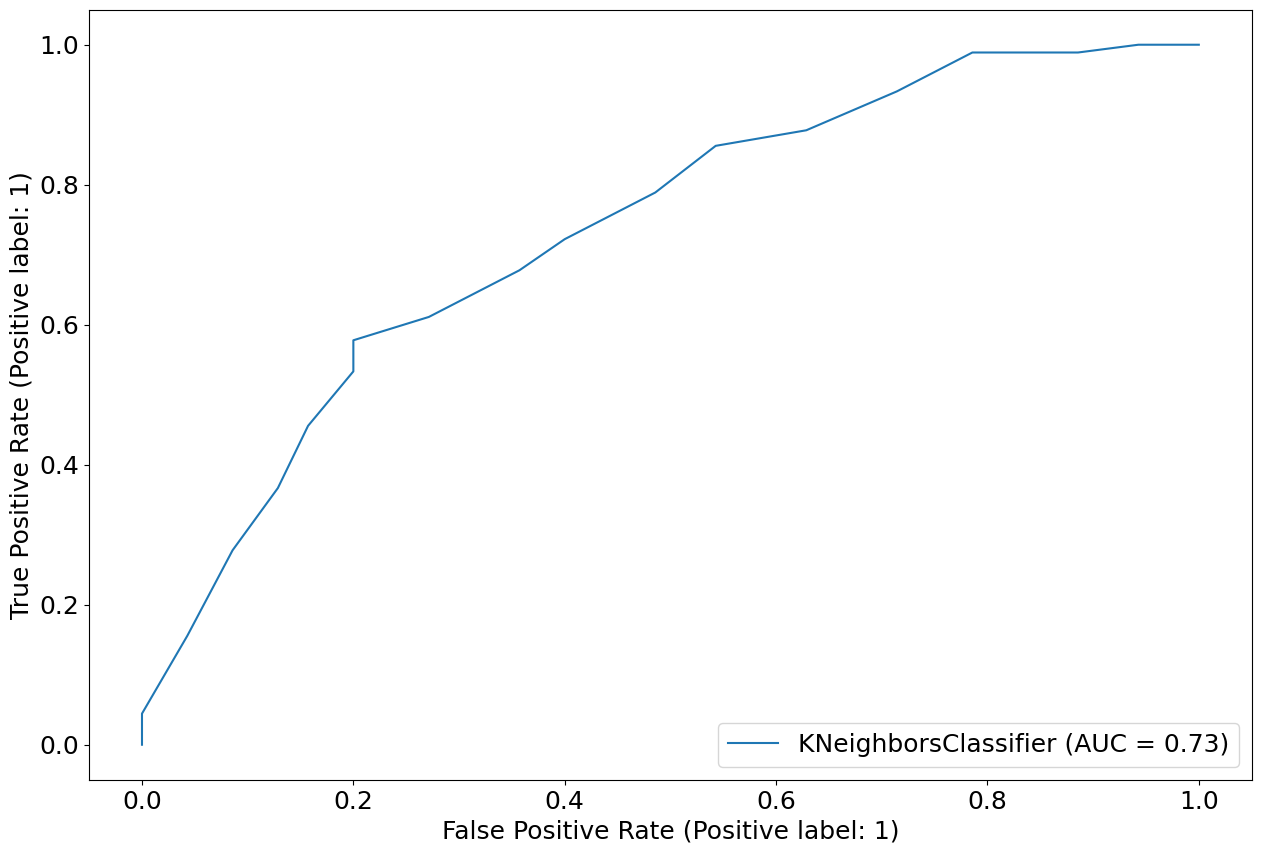

In [38]:
#a curva ROC obtida pelo k-NN para esses dados. Aqui, passamos o modelo a ser treinado e os dados de teste para a função from_estimator da classe RocCurveDisplay. No gráfico gerado, podemos o valor AUC (área sob a curva) obtido. Quanto mais perto de 1.0 (céu ROC), melhor.
RocCurveDisplay.from_estimator(modelo_KNN.fit(vinhos_treino, classes_treino,), vinhos_teste, classes_teste)
plt.show()

In [39]:
#Agora usando SVM, treinando o modelo com a função kernel linear
modelo_SVM = SVC(kernel= 'linear')
modelo_SVM.fit(vinhos_treino, classes_treino)

SVC(kernel='linear')

In [40]:
#Acurácia de classificação SVM
predicao_SVM = modelo_SVM.predict(vinhos_teste)
acuracia_SVM = accuracy_score(classes_teste, predicao_SVM)
print('Acurácia de classificação SVM: {}'.format(round(acuracia_SVM, 3)*100)+'%')

Acurácia de classificação SVM: 70.0%


In [41]:
#Precisão, revogação e medida F1
print(classification_report(classes_teste, predicao_SVM))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66        70
           1       0.74      0.72      0.73        90

    accuracy                           0.70       160
   macro avg       0.70      0.70      0.70       160
weighted avg       0.70      0.70      0.70       160



In [42]:
#Usando validação cruzada
cross_val_score(modelo_SVM, vinhos_treino, classes_treino, cv = 10)

array([0.78472222, 0.70138889, 0.70833333, 0.77777778, 0.75      ,
       0.8125    , 0.71527778, 0.77777778, 0.70833333, 0.69230769])

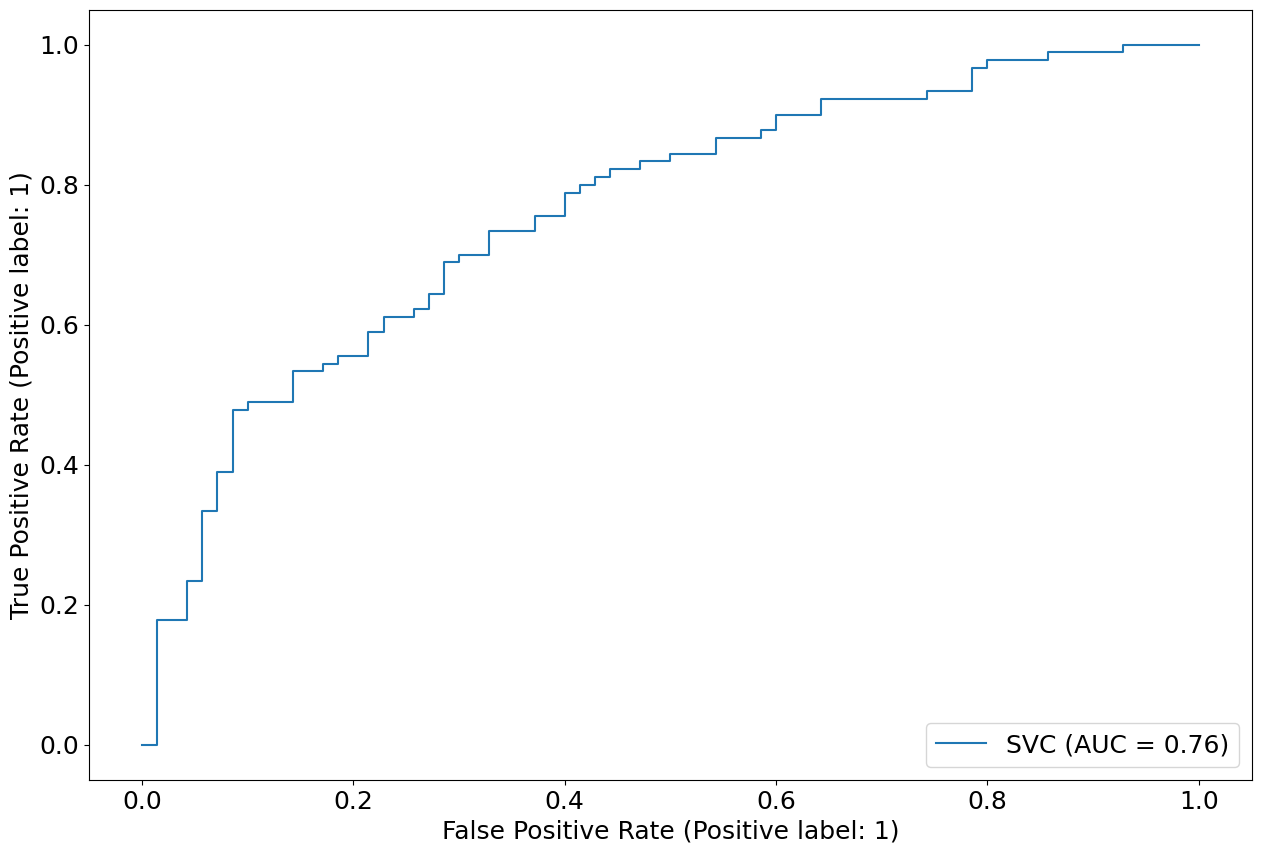

In [43]:
#Curva ROC
RocCurveDisplay.from_estimator(modelo_SVM.fit(vinhos_treino, classes_treino), vinhos_teste, classes_teste)
plt.show()

In [44]:
#Classificação usando o algoritmo Random Forest
modelo_RF = RandomForestClassifier()
modelo_RF.fit(vinhos_treino, classes_treino)

RandomForestClassifier()

In [45]:
#Acurácia de classificação com Random Forest
predicao_RF = modelo_RF.predict(vinhos_teste)
acuracia_RF = accuracy_score(classes_teste, predicao_RF)
print('Acurácia de classificação RF: {}'.format(round(acuracia_RF,3)*100)+'%')

Acurácia de classificação RF: 78.10000000000001%


In [46]:
#Precisão, revocação e medida F1
print(classification_report(classes_teste, predicao_RF))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        70
           1       0.82      0.78      0.80        90

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.78      0.78      0.78       160



In [47]:
#Validação cruzada
cross_val_score(modelo_RF, vinhos_treino, classes_treino, cv=10)

array([0.84027778, 0.76388889, 0.83333333, 0.84027778, 0.84722222,
       0.84722222, 0.80555556, 0.79861111, 0.8125    , 0.78321678])

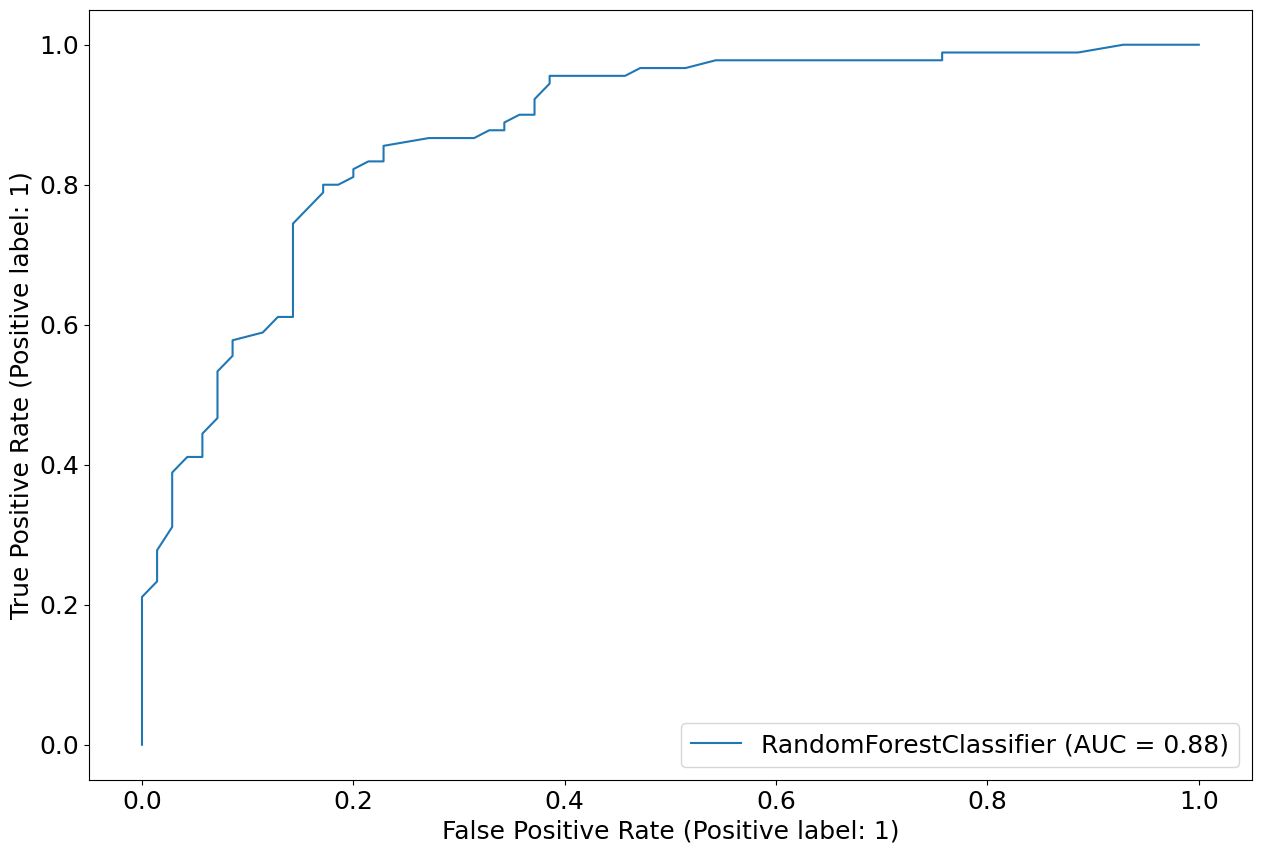

In [48]:
#Curva ROC
RocCurveDisplay.from_estimator(modelo_RF.fit(vinhos_treino, classes_treino), vinhos_teste, classes_teste)
plt.show()

*Conclusão*

_De forma geral, os resultados obtidos pelos classificadores para as diferentes métricas
de desempenho foram parecidos para este conjunto de dados._
